# Predicción de la tendecia del ETF SPY

---

# 1. Objetivo Principal del Proyecto

Desarrollar y desplegar un modelo predictivo utilizando redes LSTM para predecir la tendencia diaria al alza (retornos positivos) del ETF SPY.

## 1.1. Conceptos generales

### 📈 SPY ETF y ETF
- Un ETF (Exchange-Traded Fund) es un fondo de inversión que cotiza en bolsa y permite a los inversores comprar y vender participaciones como si fueran acciones. Replica el desempeño de un índice, sector o activo, ofreciendo diversificación, liquidez y bajos costos operativos.
- SPY es un fondo cotizado (ETF) que replica el comportamiento del índice S&P 500.
- Cuando predices SPY, estás haciendo una especie de proxy del S&P 500.

### 📊 Predecir la tendencia diaria al alza
- El modelo no va a predecir el precio exacto del SPY.
- En su lugar, intentará determinar si el precio subirá o no al día siguiente (es decir, si el retorno será positivo).
- Esto se convierte en un problema de clasificación binaria:
  - **1** si el precio sube (retorno positivo).
  - **0** si el precio baja o se mantiene.

### 🧬 Redes LSTM (Long Short-Term Memory)
- Son un tipo de Red Neuronal Recurrente (RNN) especializada en aprender secuencias de datos temporales, como precios bursátiles.
- A diferencia de las RNN normales, las LSTM recuerdan información por más tiempo (memoria a largo plazo), lo cual es clave para detectar patrones en series temporales financieras.


## 1.2. ¿Por qué usar LSTM para esto?

En mercados financieros:
- El precio de hoy depende (en parte) del comportamiento de los días anteriores.
- Las LSTM pueden detectar patrones como tendencias, momentum, retrocesos, etc.



---


# 2. ¿Qué es el SPY? Explicación detallada

El **S&P 500** es un índice bursátil que refleja el desempeño de las 500 empresas más relevantes de Estados Unidos. Su comportamiento actúa como un indicador del estado general del mercado financiero en el país. Si estas empresas crecen y generan buenos resultados, el S&P 500 aumenta; si enfrentan dificultades, el índice disminuye.


## 2.1. ¿Qué representa el SPY?

El **SPY** es un fondo cotizado en bolsa (ETF) que replica exactamente los movimientos del S&P 500. Se trata de un instrumento financiero que permite a los inversores comprar y vender participaciones en el índice como si se tratara de una acción individual.

En términos simples:
- Si el **S&P 500** sube, el **SPY** también subirá.
- Si el **S&P 500** baja, el **SPY** reflejará esa caída.

Este ETF permite a los inversores obtener exposición al mercado estadounidense sin la necesidad de adquirir acciones de todas las empresas que conforman el índice.


## 2.2. ¿Cuál es la utilidad del SPY?

El SPY se utiliza principalmente como una forma sencilla y eficiente de invertir en el mercado de valores de EE.UU. sin tener que comprar individualmente las acciones de cada una de las 500 empresas del índice. Entre sus principales ventajas se encuentran:

- **Diversificación**: Al comprar SPY, el inversor obtiene exposición a múltiples sectores de la economía estadounidense.
- **Accesibilidad**: Se puede adquirir a través de plataformas de inversión de la misma manera que se compraría una acción de cualquier empresa.
- **Eficiencia**: Es una alternativa práctica para aquellos que buscan replicar el comportamiento del mercado sin realizar una selección individual de activos.

Además es uno de los ETFs más grandes y negociados del mundo debido a varias razones:
- **Alta liquidez**: Se compra y vende con facilidad, lo que lo hace atractivo para inversores activos y operadores de corto plazo.
- **Bajas comisiones**: En comparación con fondos de inversión tradicionales, sus costos de gestión son reducidos.
- **Transparencia**: Su composición es pública y sigue directamente el índice S&P 500 sin cambios arbitrarios en su estructura.


## 2.3. Relación entre SPY y el proyecto

El objetivo del proyecto es desarrollar un modelo basado en redes neuronales LSTM para predecir si el SPY aumentará su valor en la siguiente jornada de mercado. Dado que el SPY replica el comportamiento del S&P 500, esta predicción equivale a determinar si el mercado estadounidense en su conjunto tendrá una tendencia positiva en el próximo día de negociación.

---


# 3. Índice

El objetivo de este proyecto será desarrollar y desplegar un modelo predictivo utilizando redes LSTM para predecir la tendencia diaria al alza (retornos positivos) del ETF SPY.

Explciacion que es ETF , SPY, SP500, etc... porque hemos elegido esto, ventajas, desventajas, etc...

Estrucutra e indice del proyecto


# 4. Librerías

In [1]:
import numpy as np  # Numerical operations on arrays and matrices
import pandas as pd  # Data manipulation and analysis
import datetime  # Date and time manipulation
import random  # Generate random numbers and random selection
import pandas_datareader.data as web  # Fetch financial data from online sources
import matplotlib.pyplot as plt  # Data visualization and plotting
import seaborn as sns  # Statistical data visualization
import pandas_ta as ta  # Technical analysis indicators and tools
import statsmodels.api as sm  # Statistical modeling and econometrics
from alpha_vantage.timeseries import TimeSeries  # Fetch time series data from Alpha Vantage API
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Calculate Variance Inflation Factor (VIF) for multicollinearity analysis
from sklearn.model_selection import train_test_split, GridSearchCV  # Data splitting and hyperparameter tuning
from sklearn.preprocessing import MinMaxScaler  # Scaling features to a range
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, roc_auc_score  # Model evaluation metrics
from sklearn.ensemble import RandomForestClassifier  # Random Forest for classification and feature importance
from scipy import stats  # Statistical functions and tests
from collections import defaultdict  # Dictionary subclass for counting and grouping
from minisom import MiniSom  # Self Organizing Maps for dimensionality reduction and clustering
import warnings
import yfinance as yf
warnings.filterwarnings('ignore') #ignore warnings 

In [ ]:
# pip install pandas_datareader pandas_ta statsmodels alpha_vantage minisom

  Using cached pandas_ta-0.3.14b.tar.gz (115 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=b3cb3760509b9e75c13b78751fc0c0df84a7d25d936661d93e7239bf24a8a2a2
  Stored in directory: /Users/ivan/Library/Caches/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=dd3253e6cc7c404bcd4b78fc61c7997ccc5a79cdb855e79fe00f4b5286659946
  Stored in directory: /Users/ivan/Library/Caches/pip/wheels/be/33/77/b6bb14008fa79a2dd2b79d565e941d5faa2d7f7526e528345b
Successfully built pandas_ta minisom
Note: you may need to restart the kernel to use updated packages.


# 5. Recolección de bases de datos

## 5.1 Datos Diarios del SPY

Este apartado automatiza la descarga, limpieza y preparación de datos diarios del ETF SPY desde Yahoo Finance, calculando rendimientos para análisis cuantitativo y modelado financiero.

In [30]:
# Define the ticker and date range
symbol = 'SPY'
start_date = '2018-02-01'
end_date = '2025-02-01'

# Download daily data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date, auto_adjust=False)

data = data.rename(columns={
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Adj Close': 'adjusted_close',
    'Volume': 'volume'
})

# Select only the relevant columns
data = data[['open', 'high', 'low', 'close', 'adjusted_close', 'volume']]

# Calculate daily returns based on adjusted close
data['daily_return'] = data['adjusted_close'].pct_change()

# Drop the first row with NaN
data.dropna(inplace=True)

# Save the data to CSV
data.to_excel('SPY_Daily_Data.xlsx')

[*********************100%***********************]  1 of 1 completed


In [31]:
data

Price,open,high,low,close,adjusted_close,volume,daily_return
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,,
2018-02-02,280.079987,280.230011,275.410004,275.450012,245.220947,173174800,-0.021770
2018-02-05,273.450012,275.850006,263.309998,263.929993,234.965195,294681800,-0.041822
2018-02-06,259.940002,269.700012,258.700012,269.130005,239.594559,355026800,0.019702
2018-02-07,268.500000,272.359985,267.579987,267.670013,238.294769,167376100,-0.005425
2018-02-08,268.010010,268.170013,257.589996,257.630005,229.356598,246449500,-0.037509
...,...,...,...,...,...,...,...
2025-01-27,594.809998,599.690002,594.640015,599.369995,597.572388,70361100,-0.014145
2025-01-28,600.619995,605.369995,597.250000,604.520020,602.706970,44433300,0.008592


## 5.2 FRED

Este script extrae datos diarios de los rendimientos de los bonos del Tesoro de EE.UU. a 2 y 10 años desde la API de FRED (Federal Reserve Economic Data) y calcula el diferencial de rendimiento (10 años - 2 años). 

El propósito de este conjunto de datos es análisis de la curva de rendimiento del Tesoro, un indicador clave en el análisis macroeconómico y financiero.

In [3]:
# Define the time range
start_date = '2018-02-01'
end_date = '2025-02-01'

# Fetch the daily 2-Year and 10-Year Treasury yields from FRED
dgs2 = web.DataReader('DGS2', 'fred', start_date, end_date)
dgs10 = web.DataReader('DGS10', 'fred', start_date, end_date)

# Combine the two datasets into a single DataFrame
treasury_data = pd.concat([dgs2, dgs10], axis=1)
treasury_data.columns = ['2yr_yield', '10yr_yield']

# Calculate the daily yield spread (10-Year minus 2-Year)
treasury_data['yield_spread'] = treasury_data['10yr_yield'] - treasury_data['2yr_yield']

# Drop any rows with missing values (optional)
treasury_data.dropna(inplace=True)

# Save the data to a CSV file
treasury_data.to_csv('Treasury_Yields.csv')

In [22]:
treasury_data

,2yr_yield,10yr_yield,yield_spread
DATE,,,
2017-07-03,1.41,2.35,0.94
2017-07-05,1.41,2.33,0.92
2017-07-06,1.40,2.37,0.97
2017-07-07,1.40,2.39,0.99
2017-07-10,1.40,2.38,0.98
...,...,...,...
2024-06-25,4.65,4.23,-0.42
2024-06-26,4.71,4.32,-0.39
2024-06-27,4.70,4.29,-0.41


## 5.3 Precios ajustados y cálculo de rendimientos diarios

Este script automatiza la descarga de datos de precios ajustados y el cálculo de rendimientos diarios para una selección de activos financieros clave (VXX, GLD, UUP, USO, QQQ) desde Yahoo Finance.

El objetivo es generar un conjunto de datos para el análisis de correlaciones, construcción de carteras diversificadas y modelado de riesgos en mercados financieros.

---

## Utilidad de ['VXX', 'GLD', 'UUP', 'USO', 'QQQ'] en la Predicción del SPY con LSTM

En el contexto de este proyecto, la inclusión de los tickers ['VXX', 'GLD', 'UUP', 'USO', 'QQQ'] aporta información valiosa y mejorará el rendimiento del modelo.

### ¿Qué representan estos tickers?

* **VXX (iPath S&P 500 VIX Short-Term Futures ETN):**
    * Representa la volatilidad del mercado, funcionando como un "índice del miedo".
    * Suele tener correlación negativa con el SPY, útil para capturar cambios bruscos en el mercado.
* **GLD (SPDR Gold Shares):**
    * Sigue el precio del oro, un activo refugio en tiempos de incertidumbre.
    * Añade información sobre la percepción del riesgo y la inflación.
* **UUP (Invesco DB US Dollar Index Bullish Fund):**
    * Mide el valor del dólar frente a otras divisas.
    * Ayuda a considerar el impacto de factores macroeconómicos globales.
* **USO (United States Oil Fund LP):**
    * Sigue el precio del petróleo crudo.
    * Introduce la influencia de los precios de la energía en el mercado.
* **QQQ (Invesco QQQ Trust):**
    * Sigue el indice Nasdaq 100, y por lo tanto el sector tecnologico.
    * Este sector tiene una gran influencia en el SPY.

### ¿Por qué son útiles para un modelo LSTM?

1.  **Características exógenas:**
    * El SPY está influenciado por múltiples factores. Estos ETFs proporcionan información externa relevante.
    * El modelo LSTM puede aprender las relaciones entre estos activos y el SPY.
2.  **Captura de relaciones no lineales:**
    * Las relaciones entre el SPY y estos activos son complejas y no lineales.
    * Las LSTM son excelentes para modelar estas relaciones dinámicas.
3.  **Reducción del ruido:**
    * Estos ETFs ayudan a filtrar el "ruido" en los datos del SPY.
    * Permiten al modelo enfocarse en señales significativas.
4.  **Diversificación de información:**
    * Al tener datos de volatilidad, materias primas, divisas, y el sector tecnologico, se le entrega al modelo gran cantidad de información sobre el mercado.

In [13]:
# Define symbols and time range
symbols = ['VXX', 'GLD', 'UUP', 'USO', 'QQQ']
start_date = '2018-02-01'
end_date = '2025-02-01'

# Initialize DataFrame to collect all daily returns
all_data = pd.DataFrame()

# Loop through each symbol
for symbol in symbols:
    print(f'Downloading {symbol}...')
    
    # Download data with adjusted close included
    data = yf.download(symbol, start=start_date, end=end_date, auto_adjust=False)

    # Rename adjusted close to custom name
    data = data[['Adj Close']].rename(columns={'Adj Close': f'{symbol}_adj_close'})
    
    # Calculate daily return
    data[f'{symbol}_daily_return'] = data[f'{symbol}_adj_close'].pct_change()
    
    # Keep only the daily return column
    data = data[[f'{symbol}_daily_return']]
    
    # Merge into the master DataFrame
    if all_data.empty:
        all_data = data
    else:
        all_data = pd.merge(all_data, data, left_index=True, right_index=True, how='outer')

# Drop rows where all returns are NaN (e.g., holidays)
all_data.dropna(how='all', inplace=True)

# Save to CSV
all_data.to_csv('VXX_GLD_UUP_USO_QQQ_Daily_Returns.csv')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

In [27]:
all_data

Price,VXX_daily_return,GLD_daily_return,UUP_daily_return,USO_daily_return,QQQ_daily_return
Ticker,,,,,
Date,,,,,
2018-02-02,0.128594,-0.013118,0.006053,-0.015106,-0.019945
2018-02-05,0.335160,0.002532,0.004298,-0.020705,-0.039426
2018-02-06,-0.016963,-0.010496,0.002139,-0.005482,0.026499
2018-02-07,0.033027,-0.004706,0.007686,-0.025984,-0.012938
2018-02-08,0.238886,0.001523,0.000000,-0.022635,-0.042195
...,...,...,...,...,...
2025-01-27,0.065884,-0.010405,0.000342,-0.020980,-0.029115
2025-01-28,-0.033041,0.008656,0.004108,0.011934,0.014780


## 5.4. SP500 P/E Ratio Datos

El "SP500 P/E Ratio Datos" se refiere a la información relacionada con la relación precio-beneficio (P/E ratio) del índice S&P 500. Este ratio es una métrica financiera crucial para evaluar la valoración del mercado de valores.

### ¿Qué es el P/E ratio?

* Es la relación entre el precio de las acciones y las ganancias por acción.
* Indica cuánto están dispuestos a pagar los inversores por cada dólar de ganancia de las empresas que componen el S&P 500.

### Importancia

* Ayuda a determinar si el mercado está sobrevalorado o infravalorado en comparación con sus ganancias históricas.
* Es un indicador del sentimiento del mercado y las expectativas de crecimiento.

### Consideraciones

* El P/E ratio puede variar significativamente según las condiciones económicas y las tasas de interés.
* Es fundamental compararlo con los promedios históricos y otros indicadores económicos para obtener una perspectiva más completa.

In [5]:
df = pd.read_csv("/Users/sergiomarincastro/Downloads/sp-500-pe-ratio-price-to-earnings-chart.csv")

In [6]:
def filtrar_por_rango_fechas(df):

    # Asegurar que la columna 'date' esté en formato datetime
    df['date'] = pd.to_datetime(df['date'])

    # Definir las fechas de inicio y fin del rango
    fecha_inicio = pd.to_datetime('2018-02-01')
    fecha_fin = pd.to_datetime('2025-02-01')

    # Filtrar el DataFrame por el rango de fechas
    df_filtrado = df[(df['date'] >= fecha_inicio) & (df['date'] <= fecha_fin)]

    return df_filtrado

In [7]:
df = filtrar_por_rango_fechas(df)
df

,date,value
1082,2018-02-01,23.5086
1083,2018-03-01,22.8766
1084,2018-04-01,21.6203
1085,2018-05-01,22.0874
1086,2018-06-01,22.1944
...,...,...
1162,2024-10-01,27.0888
1163,2024-11-01,28.6411
1164,2024-12-01,27.9253
1165,2025-01-01,28.6798


In [9]:
df.to_csv("S&P500_Daily_PE.csv")

# 5.7 Unión

In [77]:
data.columns = data.columns.get_level_values(0)
spy_data = data.reset_index()

treasury_data = treasury_data.reset_index()

all_data.columns = all_data.columns.get_level_values(0)
other_asset_data = all_data.reset_index()

sp500_pe_data = df.reset_index()

In [86]:
sp500_pe_data

,index,date,value
0,1082,2018-02-01,23.5086
1,1083,2018-03-01,22.8766
2,1084,2018-04-01,21.6203
3,1085,2018-05-01,22.0874
4,1086,2018-06-01,22.1944
...,...,...,...
80,1162,2024-10-01,27.0888
81,1163,2024-11-01,28.6411
82,1164,2024-12-01,27.9253
83,1165,2025-01-01,28.6798


In [83]:
# Unir los DataFrames spy_data y treasury_data usando el índice 'Date'
merged_data = pd.merge(spy_data, other_asset_data, left_index=True, right_index=True, how='inner')
merged_data = pd.merge(merged_data, sp500_pe_data, left_index=True, right_index=True, how='inner')
merged_data = pd.merge(merged_data, treasury_data, left_index=True, right_index=True, how='inner')
# Mostrar las primeras filas del DataFrame resultante
merged_data.head()

,Date_x,open,high,low,close,adjusted_close,volume,daily_return,Date_y,VXX_daily_return,...,USO_daily_return,QQQ_daily_return,index_x,date,value,index_y,DATE,2yr_yield,10yr_yield,yield_spread
0,2018-02-02,280.079987,280.230011,275.410004,275.450012,245.220947,173174800,-0.021770,2018-02-02,0.128594,...,-0.015106,-0.019946,1082,2018-02-01,23.5086,0,2018-02-01,2.16,2.78,0.62
1,2018-02-05,273.450012,275.850006,263.309998,263.929993,234.965195,294681800,-0.041822,2018-02-05,0.335160,...,-0.020705,-0.039427,1083,2018-03-01,22.8766,1,2018-02-02,2.15,2.84,0.69
2,2018-02-06,259.940002,269.700012,258.700012,269.130005,239.594559,355026800,0.019702,2018-02-06,-0.016963,...,-0.005482,0.026499,1084,2018-04-01,21.6203,2,2018-02-05,2.08,2.77,0.69
3,2018-02-07,268.500000,272.359985,267.579987,267.670013,238.294769,167376100,-0.005425,2018-02-07,0.033027,...,-0.025984,-0.012938,1085,2018-05-01,22.0874,3,2018-02-06,2.10,2.79,0.69
4,2018-02-08,268.010010,268.170013,257.589996,257.630005,229.356598,246449500,-0.037509,2018-02-08,0.238886,...,-0.022635,-0.042195,1086,2018-06-01,22.1944,4,2018-02-07,2.15,2.84,0.69


In [84]:
columnas_a_eliminar_por_nombre = ['index_x', 'index_y','DATE','Date_x','Date_y']
merged_data = merged_data.drop(columns=columnas_a_eliminar_por_nombre)
merged_data

,open,high,low,close,adjusted_close,volume,daily_return,VXX_daily_return,GLD_daily_return,UUP_daily_return,USO_daily_return,QQQ_daily_return,date,value,2yr_yield,10yr_yield,yield_spread
0,280.079987,280.230011,275.410004,275.450012,245.220947,173174800,-0.021770,0.128594,-0.013118,0.006053,-0.015106,-0.019946,2018-02-01,23.5086,2.16,2.78,0.62
1,273.450012,275.850006,263.309998,263.929993,234.965195,294681800,-0.041822,0.335160,0.002532,0.004297,-0.020705,-0.039427,2018-03-01,22.8766,2.15,2.84,0.69
2,259.940002,269.700012,258.700012,269.130005,239.594559,355026800,0.019702,-0.016963,-0.010496,0.002139,-0.005482,0.026499,2018-04-01,21.6203,2.08,2.77,0.69
3,268.500000,272.359985,267.579987,267.670013,238.294769,167376100,-0.005425,0.033027,-0.004706,0.007686,-0.025984,-0.012938,2018-05-01,22.0874,2.10,2.79,0.69
4,268.010010,268.170013,257.589996,257.630005,229.356598,246449500,-0.037509,0.238886,0.001523,0.000000,-0.022635,-0.042195,2018-06-01,22.1944,2.15,2.84,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,270.500000,273.109985,270.420013,272.609985,243.664581,69678400,0.013345,-0.048412,0.001461,-0.007609,0.023686,0.007161,2024-10-01,27.0888,2.32,2.77,0.45
81,272.149994,272.489990,270.260010,270.940002,242.171906,93519900,-0.006126,0.010394,-0.002189,-0.000807,-0.020246,-0.000646,2024-11-01,28.6411,2.42,2.84,0.42
82,272.410004,273.940002,272.329987,273.600006,244.549454,71258400,0.009818,-0.048998,-0.004955,0.001615,-0.022140,0.015700,2024-12-01,27.9253,2.40,2.83,0.43
83,274.529999,275.190002,274.260010,274.899994,245.711472,45385200,0.004752,0.000000,-0.000980,-0.000806,-0.009811,0.009031,2025-01-01,28.6798,2.47,2.89,0.42


In [88]:
# 1. Obtener la lista de columnas
columnas = list(merged_data.columns)
# 2. Encontrar el índice de la columna 'Date'
indice_date = columnas.index('date')
# 3. Eliminar 'Date' de su posición actual
columnas.pop(indice_date)
# 4. Insertar 'Date' al principio de la lista
columnas.insert(0, 'date')
# 5. Reordenar las columnas del DataFrame
merged_data = merged_data[columnas]

merged_data = merged_data.rename(columns={'value': 'p/e ratio'})

merged_data.to_csv("SPY_Final_Dataset.csv")
merged_data

,date,open,high,low,close,adjusted_close,volume,daily_return,VXX_daily_return,GLD_daily_return,UUP_daily_return,USO_daily_return,QQQ_daily_return,value,2yr_yield,10yr_yield,yield_spread
0,2018-02-01,280.079987,280.230011,275.410004,275.450012,245.220947,173174800,-0.021770,0.128594,-0.013118,0.006053,-0.015106,-0.019946,23.5086,2.16,2.78,0.62
1,2018-03-01,273.450012,275.850006,263.309998,263.929993,234.965195,294681800,-0.041822,0.335160,0.002532,0.004297,-0.020705,-0.039427,22.8766,2.15,2.84,0.69
2,2018-04-01,259.940002,269.700012,258.700012,269.130005,239.594559,355026800,0.019702,-0.016963,-0.010496,0.002139,-0.005482,0.026499,21.6203,2.08,2.77,0.69
3,2018-05-01,268.500000,272.359985,267.579987,267.670013,238.294769,167376100,-0.005425,0.033027,-0.004706,0.007686,-0.025984,-0.012938,22.0874,2.10,2.79,0.69
4,2018-06-01,268.010010,268.170013,257.589996,257.630005,229.356598,246449500,-0.037509,0.238886,0.001523,0.000000,-0.022635,-0.042195,22.1944,2.15,2.84,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2024-10-01,270.500000,273.109985,270.420013,272.609985,243.664581,69678400,0.013345,-0.048412,0.001461,-0.007609,0.023686,0.007161,27.0888,2.32,2.77,0.45
81,2024-11-01,272.149994,272.489990,270.260010,270.940002,242.171906,93519900,-0.006126,0.010394,-0.002189,-0.000807,-0.020246,-0.000646,28.6411,2.42,2.84,0.42
82,2024-12-01,272.410004,273.940002,272.329987,273.600006,244.549454,71258400,0.009818,-0.048998,-0.004955,0.001615,-0.022140,0.015700,27.9253,2.40,2.83,0.43
83,2025-01-01,274.529999,275.190002,274.260010,274.899994,245.711472,45385200,0.004752,0.000000,-0.000980,-0.000806,-0.009811,0.009031,28.6798,2.47,2.89,0.42


# 6. EDA

In [90]:
df = merged_data 

In [91]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,date,open,high,low,close,adjusted_close,volume,daily_return,VXX_daily_return,GLD_daily_return,UUP_daily_return,USO_daily_return,QQQ_daily_return,value,2yr_yield,10yr_yield,yield_spread
0,2018-02-01,280.079987,280.230011,275.410004,275.450012,245.220947,173174800,-0.021770,0.128594,-0.013118,0.006053,-0.015106,-0.019946,23.5086,2.16,2.78,0.62
1,2018-03-01,273.450012,275.850006,263.309998,263.929993,234.965195,294681800,-0.041822,0.335160,0.002532,0.004297,-0.020705,-0.039427,22.8766,2.15,2.84,0.69
2,2018-04-01,259.940002,269.700012,258.700012,269.130005,239.594559,355026800,0.019702,-0.016963,-0.010496,0.002139,-0.005482,0.026499,21.6203,2.08,2.77,0.69
3,2018-05-01,268.500000,272.359985,267.579987,267.670013,238.294769,167376100,-0.005425,0.033027,-0.004706,0.007686,-0.025984,-0.012938,22.0874,2.10,2.79,0.69
4,2018-06-01,268.010010,268.170013,257.589996,257.630005,229.356598,246449500,-0.037509,0.238886,0.001523,0.000000,-0.022635,-0.042195,22.1944,2.15,2.84,0.69


## 6.1 Análisis inicial

Para empezar, generamos estadísticas resumidas del conjunto de datos para obtener una visión general de la distribución de cada característica, incluyendo medidas como la media, la desviación estándar y los cuartiles.

In [92]:
df.describe()

,date,open,high,low,close,adjusted_close,volume,daily_return,VXX_daily_return,GLD_daily_return,UUP_daily_return,USO_daily_return,QQQ_daily_return,value,2yr_yield,10yr_yield,yield_spread
count,85,85.000000,85.000000,85.000000,85.000000,85.000000,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,2021-07-31 23:43:03.529411840,269.070706,270.797178,266.982469,268.821293,239.948213,1.050567e+08,-0.000155,0.003913,-0.000470,0.000804,0.000101,0.000601,24.960545,2.346353,2.889412,0.543059
min,2018-02-01 00:00:00,256.750000,261.309998,252.919998,257.470001,229.356598,4.538520e+07,-0.041822,-0.114447,-0.016146,-0.008030,-0.042687,-0.042195,18.935300,2.050000,2.730000,0.410000
25%,2019-11-01 00:00:00,264.790009,267.010010,263.309998,265.149994,236.844772,6.773190e+07,-0.005547,-0.033110,-0.004080,-0.001277,-0.010509,-0.005769,22.100700,2.250000,2.830000,0.470000
50%,2021-08-01 00:00:00,270.309998,271.609985,267.720001,269.589996,240.455780,9.114020e+07,0.000728,-0.010532,-0.000162,0.000426,0.000781,0.001199,23.452700,2.310000,2.870000,0.510000
75%,2023-05-01 00:00:00,272.320007,273.940002,271.179993,272.799988,243.333923,1.199569e+08,0.008227,0.023893,0.002458,0.003840,0.007622,0.010364,27.453600,2.490000,2.950000,0.620000
max,2025-02-01 00:00:00,280.079987,280.410004,278.079987,278.869995,248.265594,3.550268e+08,0.027359,0.335160,0.017456,0.008967,0.037588,0.037158,38.229700,2.590000,3.110000,0.780000
std,NaN,5.145732,4.562147,5.722687,5.094640,4.410127,5.541799e+07,0.012037,0.067514,0.006309,0.003868,0.015538,0.014843,4.090233,0.141899,0.087537,0.094592


## 6.2 Distribución de los Retornos Diarios

Después, representamos gráficamente la dispersión de los cambios porcentuales diarios del ETF SPY, con el objetivo de analizar su dinámica y detectar tendencias relevantes o valores atípicos.


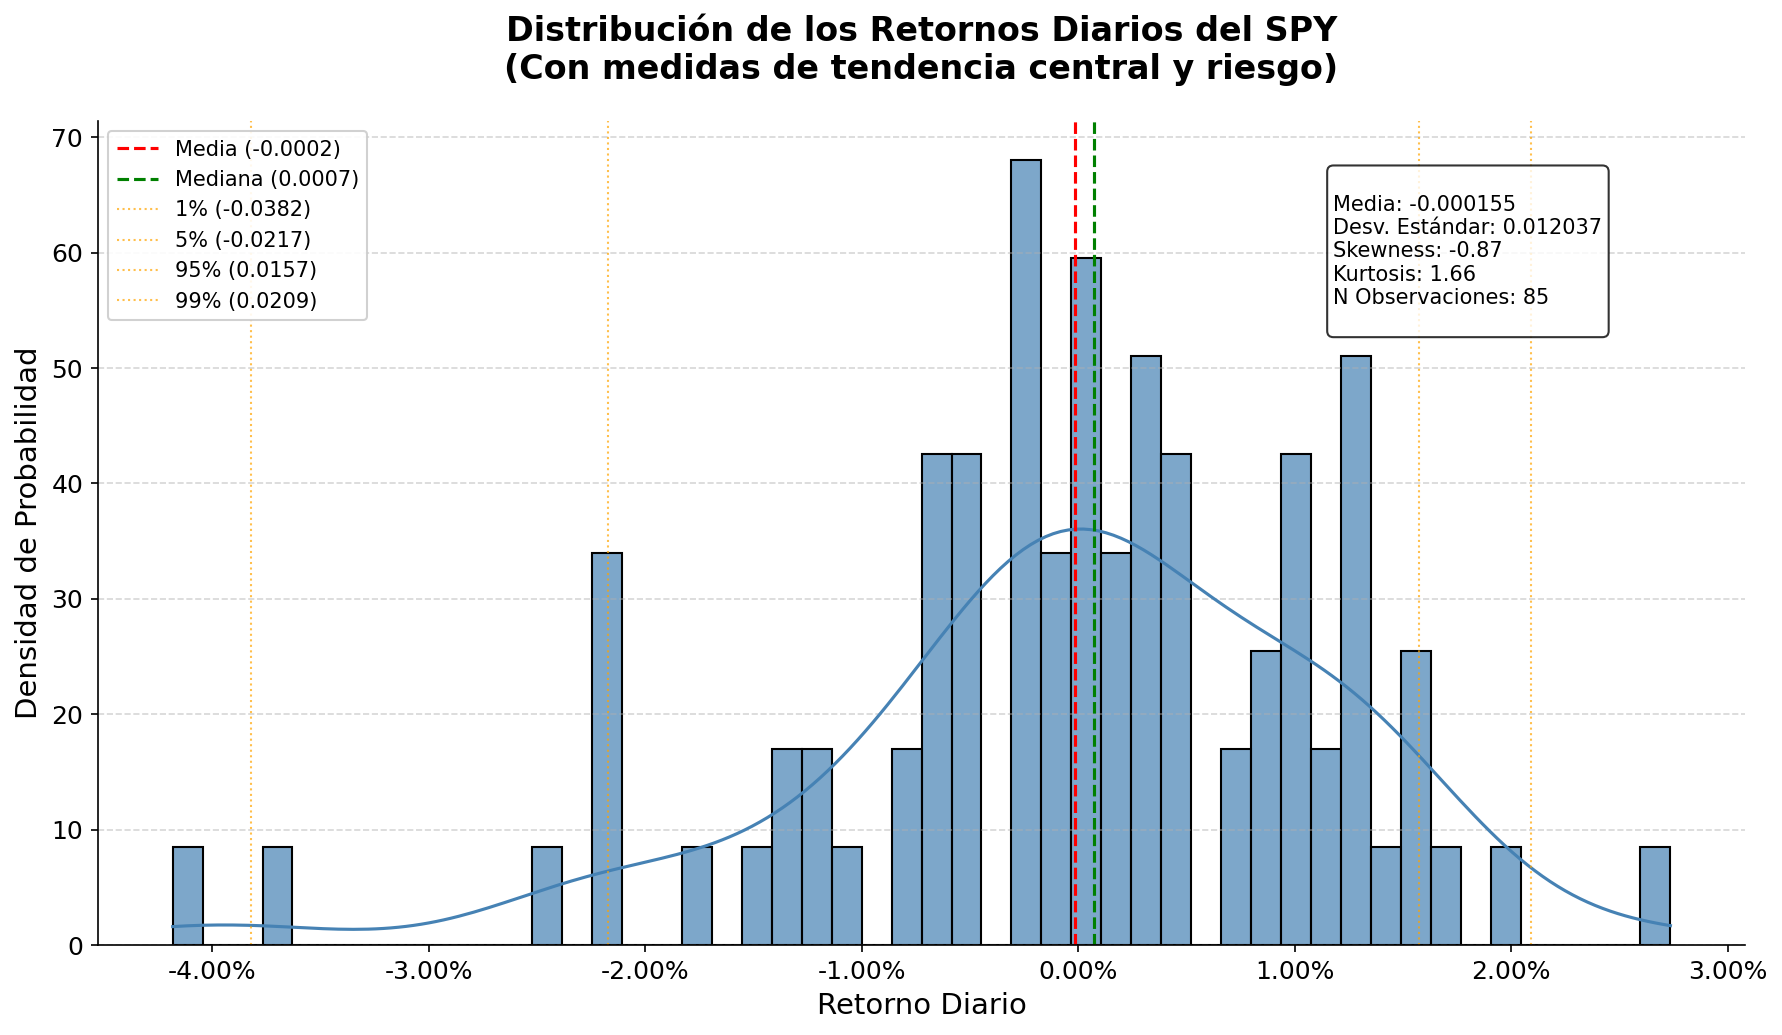

In [ ]:
plt.figure(figsize=(12, 7), dpi=150)

# Histograma con mejoras
hist = sns.histplot(df['daily_return'], bins=50, kde=True, 
                   color='steelblue', edgecolor='black',
                   alpha=0.7, stat='density')  # density para comparar con KDE

# Líneas de referencia importantes
plt.axvline(x=df['daily_return'].mean(), color='red', linestyle='--', 
           linewidth=1.5, label=f'Media ({df["daily_return"].mean():.4f})')
plt.axvline(x=df['daily_return'].median(), color='green', linestyle='--', 
           linewidth=1.5, label=f'Mediana ({df["daily_return"].median():.4f})')

# Añadir líneas para percentiles importantes (riesgo)
for percentile in [1, 5, 95, 99]:
    pct_value = df['daily_return'].quantile(percentile/100)
    plt.axvline(x=pct_value, color='orange', linestyle=':', 
               linewidth=1, alpha=0.7, 
               label=f'{percentile}% ({pct_value:.4f})')

plt.title('Distribución de los Retornos Diarios del SPY\n(Con medidas de tendencia central y riesgo)', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Retorno Diario', fontsize=14)
plt.ylabel('Densidad de Probabilidad', fontsize=14)  # Cambiado por stat='density'

# Formatear ejes para porcentajes
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2%}'))

# Leyenda y estilo
plt.legend(fontsize=10, framealpha=0.9)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Cuadrícula y estilo
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()

# Añadir texto con estadísticas clave
stats_text = f"""
Media: {df['daily_return'].mean():.6f}
Desv. Estándar: {df['daily_return'].std():.6f}
Skewness: {df['daily_return'].skew():.2f}
Kurtosis: {df['daily_return'].kurtosis():.2f}
N Observaciones: {len(df):,}
"""
plt.annotate(stats_text, xy=(0.75, 0.75), xycoords='axes fraction', 
            fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# explicacion

## 6.3 Matriz de correlación

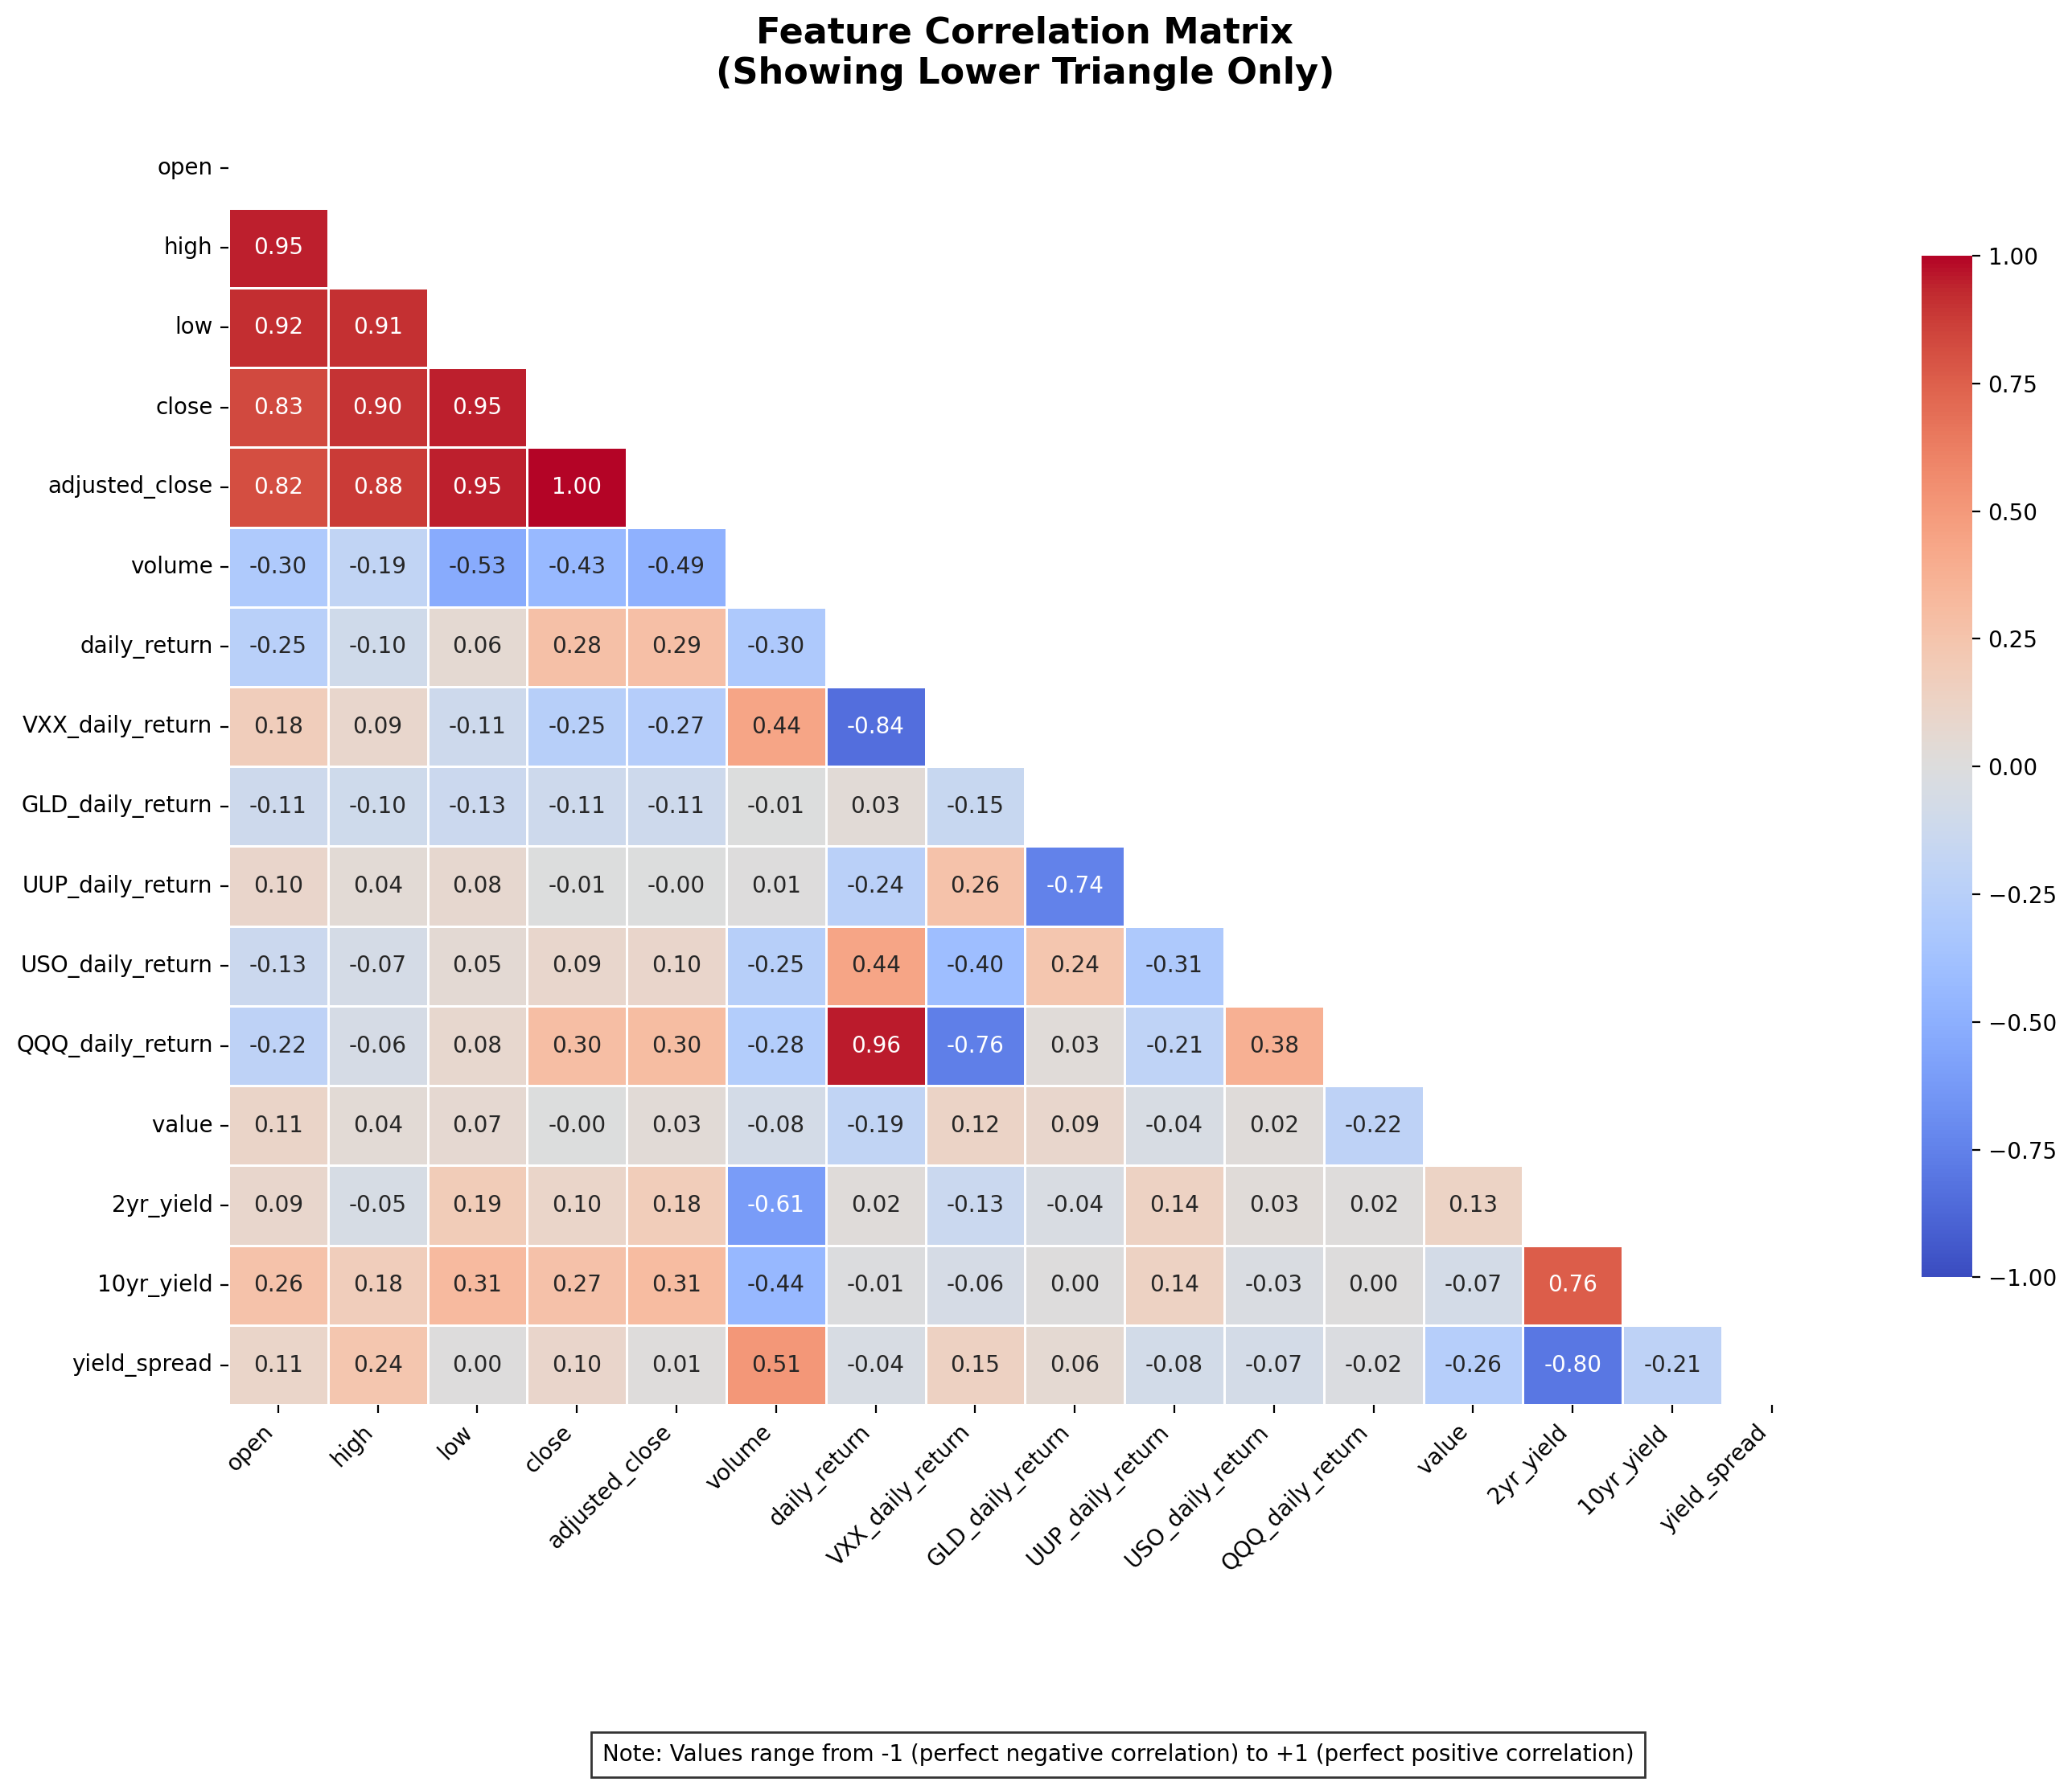

In [99]:
numeric_df = df.select_dtypes(include=['number', 'float', 'int'])  # More comprehensive numeric selection

plt.figure(figsize=(14, 10), dpi=200)
correlation_matrix = numeric_df.corr()

# Create mask for upper triangle to avoid redundancy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Enhanced heatmap with better styling
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f',
            center=0,
            vmin=-1, 
            vmax=1,
            linewidths=0.5,
            annot_kws={'size': 10},
            cbar_kws={'shrink': 0.8})

plt.title('Feature Correlation Matrix\n(Showing Lower Triangle Only)', 
         fontsize=16, pad=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add explanatory note
plt.figtext(0.5, -0.1, 
           "Note: Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation)",
           ha="center", 
           fontsize=10,
           bbox={"facecolor":"white", "alpha":0.8, "pad":5})

plt.tight_layout()
plt.show()

## 6.4. Key par plot

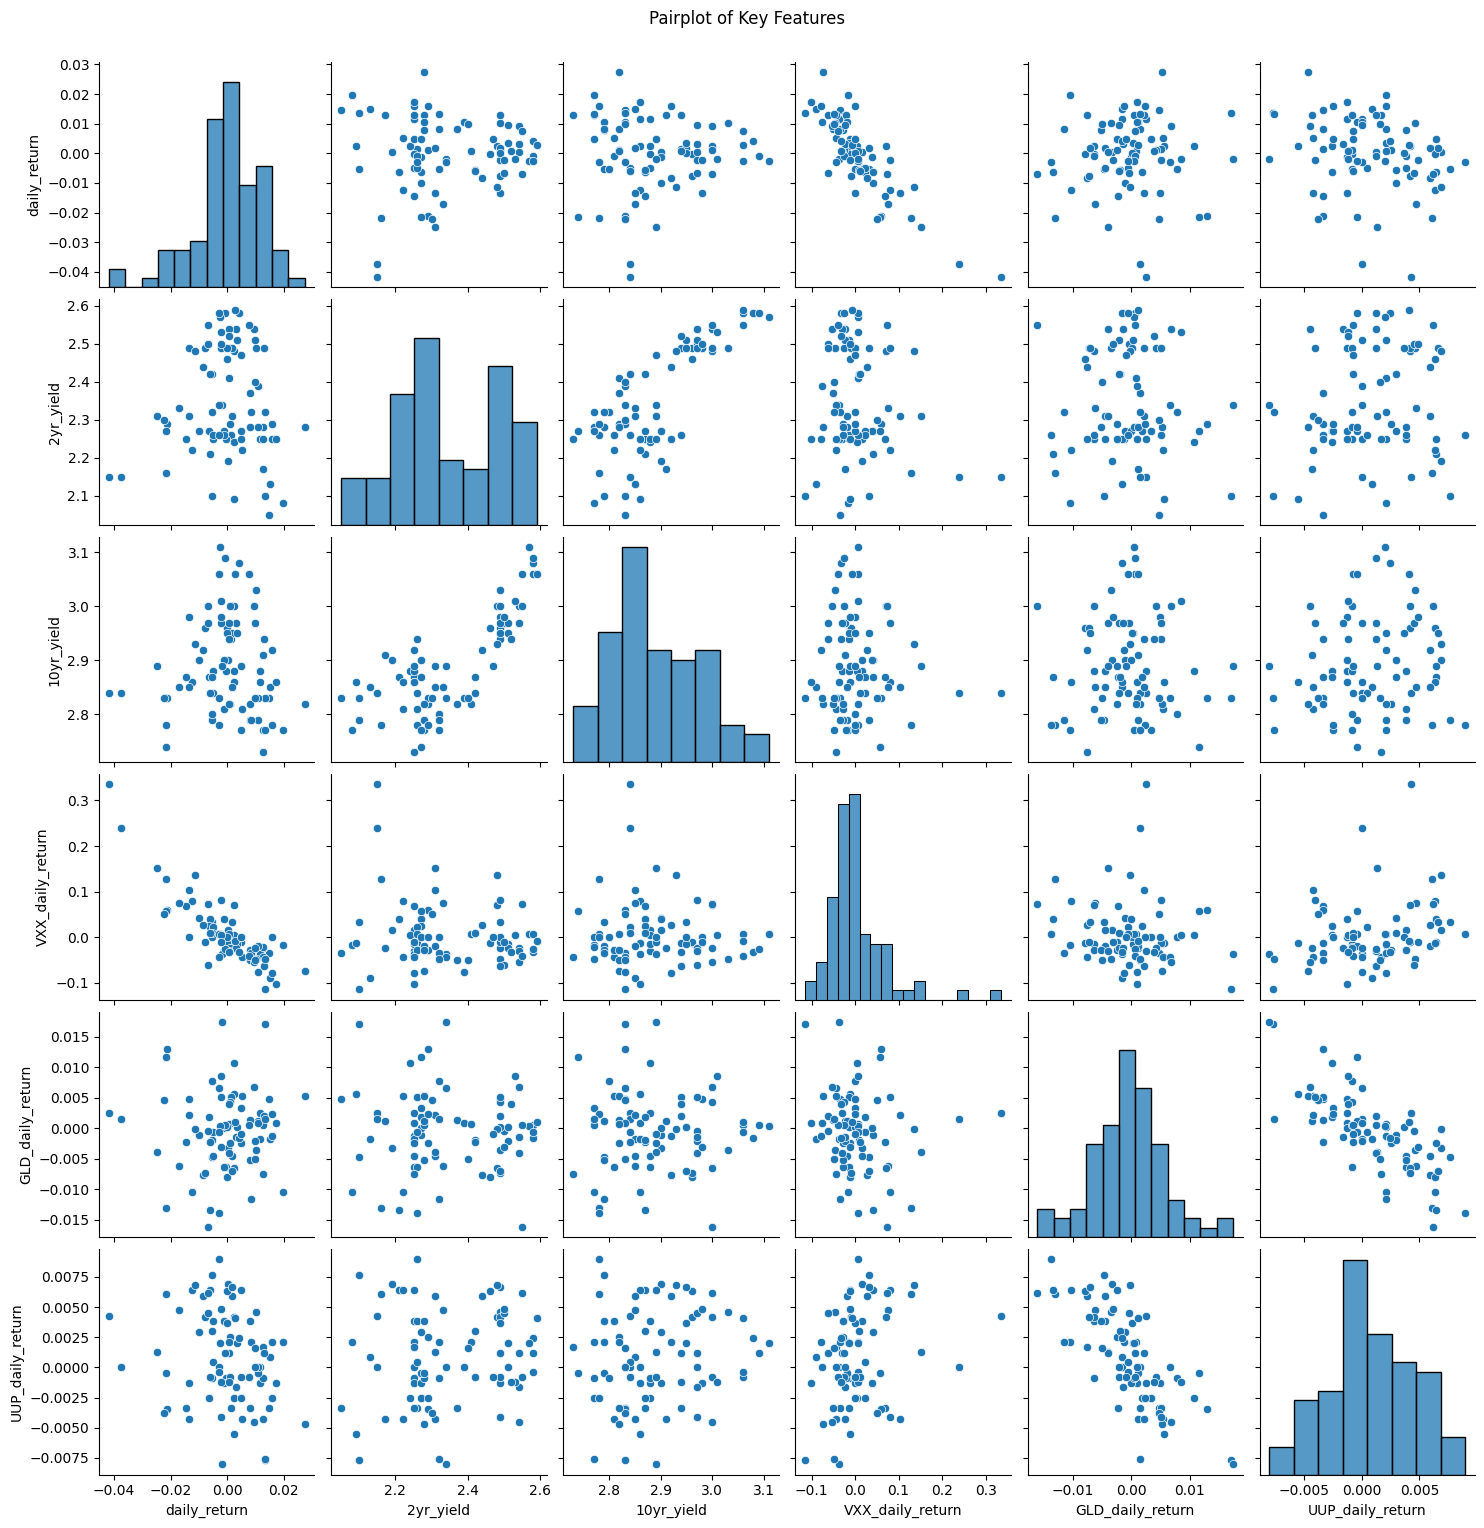

In [100]:
sns.pairplot(numeric_df[['daily_return', '2yr_yield', '10yr_yield', 'VXX_daily_return', 'GLD_daily_return', 'UUP_daily_return']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()


# 7. Extracción de características

In [ ]:
data = df 

## revisar da problema el codigo orignal  de pandas_ta